In [3]:
# modules for research report
from datascience import *
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# module for YouTube video
from IPython.display import YouTubeVideo

# Free Music Archive: A Dataset For Music Analysis

This dataset was introduced by Michaël Defferrard, Kirell Benzi, Pierre Vandergheynst, and Xavier Bresson at the International Society for Music Information Retrieval (MIR) Conference in 2017.
It has been cleaned for your convenience: all missing values have been removed, and low-quality observations and variables have been filtered out. A brief summary of the dataset, originally
given at the conference, is provided below. 

## Summary

>We introduce the Free Music Archive (FMA), an open and easily accessible dataset suitable for evaluating several tasks in MIR, a field concerned with browsing, searching, and
organizing large music collections. The community's growing interest in feature and end-to-end learning is however restrained by the limited availability of large audio datasets.
The FMA aims to overcome this hurdle by providing 917 GiB and 343 days of Creative Commons-licensed audio from 106,574 tracks from 16,341 artists and 14,854 albums, arranged in a
hierarchical taxonomy of 161 genres. It provides full-length and high-quality audio, pre-computed features, together with track- and user-level metadata, tags, and free-form text
such as biographies.

## Data Description

This dataset consists of three tables stored in the `data` folder:
1. `tracks` provides information on individual tracks.
2. `genres` contains information on all of the genres.
3. `features` contains information on the Spotify audio features of each track.

A description of each table's variables is provided below:

`tracks`:
* `track_id`: a unique ID for each track
* `track_title`: title of each track
* `artist_name`: name of the artist
* `album_title`: title of the album that the track comes from
* `track_duration`: the length of the song in seconds
* `track_genre`: the genre(s) that the track fall(s) into
* `album_date_released`: a string indicating the album release date
* `album_type`: specifies whether the album is studio-recorded, live, or from a radio program
* `album_tracks`: number of tracks on the album

`genres`:
* `genre_id`: a unique ID for each genre
* `title`: the name of the genre
* `# tracks`: the number of tracks that fall into this genre
* `parent`: the genre that this subgenre falls under (will be 0 if not a subgenre)

`features` (descriptions from the [Spotify API page](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)):
* `track_id`: a unique ID for each track
* `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
* `instrumentalness`: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. 
* `liveness	`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
* `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. 
* `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
* `valence`: 	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

## Preview

The tables are loaded in the code cells below. Take some time to explore them!

In [134]:
#load tracks
tracks = Table().read_table("data/tracks_final.csv")
tracks

track_id,track_title,artist_name,album_title,track_duration,track_genre,album_date_released,album_type,album_tracks
145,Amoebiasis,Amoebic Ensemble,Amoebiasis,326,Jazz,2009-01-06,Album,0
155,Maps of the Stars Homes,Arc and Sender,unreleased demo,756,Rock,2009-01-06,Single Tracks,1
201,Big City,Ed Askew,What I Know,210,Folk,2009-01-07,Album,10
307,Out on the farm,Blah Blah Blah,Green Collection,205,Rock,2007-09-01,Album,0
309,Where are all the people,Blah Blah Blah,Green Collection,229,Rock,2007-09-01,Album,0
319,Complete Shakespeare,Blah Blah Blah,Green Collection,156,Rock,2007-09-01,Album,0
327,Hands Beckoning,Blah Blah Blah,Stripey Collection,259,Rock,1982-04-06,Album,0
328,Central Park,Blah Blah Blah,Stripey Collection,236,Rock,1982-04-06,Album,0
350,Gotta Go,Blah Blah Blah,30th Anniversary Blah Blah Blah,101,Rock,2009-01-01,Album,21
364,Sunspot activity,Blah Blah Blah,30th Anniversary Blah Blah Blah,152,Rock,2009-01-01,Album,21


In [132]:
#load genres
genres = Table().read_table("data/genres_final.csv")
genres

genre_id,title,#tracks,parent
1,Avant-Garde,8693,38
2,International,5271,0
3,Blues,1752,0
4,Jazz,4126,0
5,Classical,4106,0
6,Novelty,914,38
7,Comedy,217,20
8,Old-Time / Historic,868,0
9,Country,1987,0
10,Pop,13845,0


In [133]:
#load features
features = Table().read_table("data/features_final.csv")
features

track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
145,0.235506,0.438672,0.487752,0.716122,0.0703593,0.0472978,120.79,0.650452
155,0.981657,0.142249,0.912122,0.967294,0.36351,0.087527,91.912,0.0343253
201,0.991813,0.461855,0.543751,0.964922,0.137006,0.0256877,93.945,0.758632
307,0.77377,0.552026,0.251328,0.568976,0.110743,0.0506326,117.247,0.356984
309,0.335481,0.390263,0.0210674,0.937508,0.0890457,0.0414906,60.382,0.0399321
319,0.890498,0.316413,0.0596131,0.913303,0.108808,0.0387785,133.934,0.122417
327,0.928171,0.553091,0.303937,0.95423,0.110752,0.107401,110.039,0.616368
328,0.297541,0.624953,0.176884,0.815871,0.0928226,0.0551486,114.858,0.503635
350,0.989664,0.463938,0.363612,0.919011,0.11874,0.0376218,99.384,0.591003
364,0.98638,0.61286,0.15611,0.104549,0.107289,0.198543,109.256,0.483544


<br>

# Research Report

## Introduction

For this project we have decided to analyze a small random sample from the Free Music Archive (FMA), a dataset introduced in 2017 at the International Society for Music Information Retrieval (MIR) Conference. The dataset is divided into `tracks`, `genres`, and `features`.

The `tracks` table provides the `track_id` and `track_title` to identify every track in the sample. `tracks` mainly serves to identify all the specific elements of each individual track such as genre, length, release date, or the album it was released on.

The `genres` table provides the name of every possible genre in the entire dataset and identifies that genre by `genre_id` and provides us with the number of tracks in the dataset that fall under each genre and the genre id for the parent genre of that subgenre. 

The`features` table contains each track in the sample and so it has the same number of rows as the `tracks` table. `features` defines eight possible features any song can have and assigns to each song a value for every one of the eight features to quantify the presence of that feature in the song. For example, one of the eight features is `valence` which is a measure from 0 to 1 describing the musical positiveness conveyed in the track. Higher values of valence means a track sounds more positive (e.g. happy, exciting, etc.) and lower values of valence means a track sounds more negative (e.g. sad, depressing, etc.). Each track is given a certain value for valence depending on how ‘happy’ or ‘sad’ it sounds. The same goes for the other features for all tracks. 

The `genres` table will not be used for this analysis as all we need to know about genres is the genre of each track, and thankfully that information is included in the `track_genre` column of the `tracks` table. We will mainly be analyzing the relationship between track features and track genre. For this analysis, we will start by focusing on the `danceability` feature in the “Folk” and “Hip-Hop” genres. We chose these two genres as they both have a similar number of tracks in the sample.

## Hypothesis Testing and Prediction Questions


Having listened to some Hip-Hop songs, and some Folk songs, and combined the information in the dataset to examine the average danceabilities, we asked ourselves if people will notice or care if they are dancing to a hip-hop song, or a Folk song, as the values were not extremley different. This leads us to the hypothesis question: **Is the difference in danceability between Folk and Hip-Hop due to chance or does it show that one is generally more danceable than the other in the population?** There are two possible answers to this hypothesis question. One one hand, the null hypothesis will be: **in the population, the distribution of danceability of songs is the same for Hip-Hop tracks as well as Folk tracks. The difference in the sample is due to chance.** On the other hand, the alternative hypothesis is: **in the population, the average danceability of Hip-Hop tracks is higher than that of Folk tracks.** 

If there is a difference, this leads us to the question of whether we can actually predict what a song's genre will be based upon features such as danceability. The question would specifically be: **in general, are genres distinguishable by the features outlined in the data set, specifically the genres Folk and Hip-Hop?** We will use a k-nearest neighbors model to figure this out, and predict the categories.

## Exploratory Data Analysis

**You may change the order of the plots and tables.**

**Table Requiring a Join Operation:**

In [135]:
# Use this cell to join two datasets
all_features_table = features.join("track_id",tracks,"track_id").drop("track_id","track_title","artist_name","album_title","album_type","album_date_released","album_tracks").where("track_genre",are.contained_in(make_array("Folk","Hip-Hop")))
joined = all_features_table.select("track_genre", "danceability")
folk_hiphop = joined.where("track_genre", are.contained_in(make_array("Folk", "Hip-Hop")))
all_features_table.show(5)

acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,track_duration,track_genre
0.991813,0.461855,0.543751,0.964922,0.137006,0.0256877,93.945,0.758632,210,Folk
0.995716,0.448509,0.148549,0.942322,0.116273,0.0465746,45.532,0.355909,309,Folk
0.311324,0.291688,0.810857,0.440107,0.362146,0.106019,166.2,0.548057,104,Hip-Hop
0.927184,0.50923,0.487058,0.800961,0.0958261,0.0330235,111.08,0.542597,163,Folk
0.155801,0.157069,0.00395057,0.836295,0.471216,0.785159,127.185,1e-05,267,Folk


*Since we are doing an analysis that relates the genre of a track to one of its features, we have joined the* `tracks` *and* `features` *tables together and selected the only values we need. We then eliminated all the genres except for Folk and Hip-Hop because these are the genres we have decided to focus on. Seperate tables were defined that contain only the feature `danceability` as that is the feature we decided to focus on. The table* `joined` *will be useful when it comes to conducting A/B testing later and the table* `folk_hiphop` *contains the genre and danceability of all the Folk and Hip-Hop tracks.* 

**Quantitative Plot:**

Text(0.5, 1.0, 'Distribution of danceability of tracks in each genre')

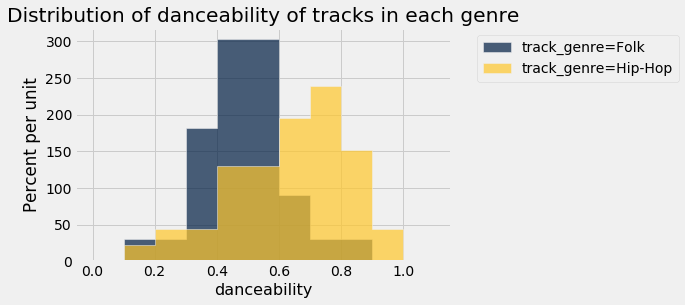

In [236]:
# Use this cell to generate your quantitative plot
folk_hiphop.hist(1, group = "track_genre", bins = np.arange(0, 1.2, 0.1))
plots.title("Distribution of danceability of tracks in each genre")

*These two histograms help us visualize the distribution of danceability in tracks across the tracks in each genre that we are looking at in the sample. The distribution of danceability for Hip-Hop tracks seems to skew towards the left while the distribtuion of danceability for Folk tracks seems to be relatively normal. The mean and median danceability for Folk seem to be less than that of Hip-Hop, this can be confirmed by the bar graph below.* 

**Aggregated Data Table:**

In [237]:
# Use this cell to generate your aggregated data table
genre_sizes = folk_hiphop.group("track_genre", np.average).column(1)
genre_averages_and_size = folk_hiphop.group("track_genre").with_columns("danceability_avergae",genre_sizes)
genre_averages_and_size

track_genre,count,danceability_avergae
Folk,33,0.475934
Hip-Hop,46,0.634572


*There are 33 Folk songs and 46 Hip-Hop songs. The sizes of each genre and the sample are not too different but it is obvious that there are more Hip-Hop songs in the sample. The table also displays the average danceability for each genre of the tracks in the sample. For example, since each track is assigned a value for danceability, the average danceability for all the tracks in the sample that were assigned the genre Hip-Hop is 0.634572. There could be a potential bias in the data where the danceability of Hip-Hop in the sample reflects the danceability of Hip-Hop as a genre in the real-life population more accuraetly than the danceability of Folk songs in the sample.*

**Qualitative Plot:**

Text(0.5, 1.0, 'Average danceability for each genre')

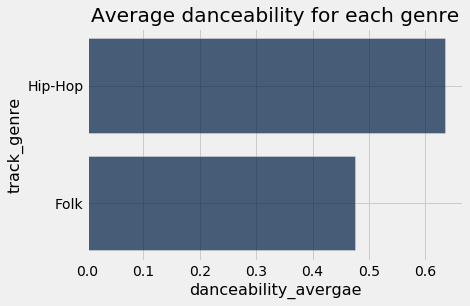

In [240]:
# Use this cell to generate your qualitative plot
genre_averages_and_size.sort(2, descending=True).barh(0, 2)
plots.title("Average danceability for each genre")

*Our two main focus genres are Hip-Hop and Folk. As we can see from the ranked categorical distribution of average danceability per genre, the Hip-Hop tracks in the sample have a higher danceability on average than the Folk genre. The Hip-Hop danceability average is close to 0.62 while the Folk danceability average is closer to 0.47. We will now conduct a hypothesis test to see if this difference is due to randmoness in samlping or not.*

## Hypothesis Testing

**Do not copy code from demo notebooks or homeworks! You may split portions of your code into distinct cells. Also, be sure to
set a random seed so that your results are reproducible.**

**Hypothesis Test and Test Statistic**

The test we will be performing is an A/B test. Our test statistic will be the difference between the average danceability of Hip-Hop and the average danceability of Folk. In our data exploration, we noticed there is a difference between the average danceability of Hip-Hop and the average danceability of Folk in the sample. We would like to know whether or not this difference in the sample is due to chance or if it does indeed tell us something about the difference in average danceability between these two genres in the real population. A/B testing is used to decide whether two numerical samples come from the same underlying distribution. Here we will be testing if the danceability of Hip-Hop and Folk in the sample come from the same distribution in the population. Our choice of test statistic is based on wanting to know if the difference in average danceabilities between genres is random or if it reflects the population, and therefore we want to randomly simulate this difference thousands of times.




**Null hypothesis:** 

In the population, the distribution of danceability of songs is the same for Hip-Hop tracks as well as Folk tracks. The difference in the sample is due to chance.
 

**Alternative hypothesis:** 

In the population, the average danceability of Hip-Hop tracks is higher than that of Folk tracks. 
 
 
 
 
We will use a 99% confidence interval to determine the conclusion of the hypothesis test.

In [241]:
random.seed(1231)
# finding observed difference between average danceability for pop and average danceability for hip-hop
folk_avg = np.mean(folk_hiphop.where("track_genre", are.equal_to("Folk")).column("danceability"))
hiphop_avg = np.mean(folk_hiphop.where("track_genre", are.equal_to("Hip-Hop")).column("danceability"))
observed_test_statistic = hiphop_avg - folk_avg 
observed_test_statistic


0.15863852328353106

In [179]:
random.seed(1231)
# defining a function to find the difference between average value of a feature for two genres

def average_diff(tbl, label1, label2):
    """takes in a table of two columns, 
    where the first column is genres and the other is a feature, 
    as well as the names of two genres,
    and returns a single value of our test statistic"""
    lbl_1_avg = np.mean(tbl.where("track_genre", label1).column(1))
    lbl_2_avg = np.mean(tbl.where("track_genre", label2).column(1))
    return lbl_1_avg - lbl_2_avg

In [97]:
random.seed(1231)
# shuffle the labels 

shuffled_lbls = joined.sample(with_replacement = False).column(1)
shuffled_tbl = joined.drop(1).with_columns("danceability", shuffled_lbls)
shuffled_tbl

track_genre,danceability
Folk,0.320081
Folk,0.309217
Hip-Hop,0.51089
Folk,0.514916
Folk,0.675885
Folk,0.431653
Folk,0.145067
Folk,0.318093
Folk,0.76214
Folk,0.413276


In [88]:
random.seed(1231)
# find test statistic once for shuffled table

average_diff(shuffled_tbl, "Hip-Hop", "Folk")

0.009631555449143514

In [99]:
random.seed(1231)
# define a function that shuffles a table and returns a value of our test statistic

def shuffle_avg_diff(tbl):
    shuffled_labels = tbl.sample(with_replacement = False).column(1)
    shuffled_table = tbl.drop(1).with_columns("danceability", shuffled_labels)
    return average_diff(shuffled_table, "Hip-Hop", "Folk")

shuffle_avg_diff(joined)

0.12388162464762847

In [107]:
random.seed(1231)
# simulate the process thousands of times

average_differences = make_array()
repititions = 5000

for i in np.arange(repititions):
    average_difference = shuffle_avg_diff(joined)
    average_differences = np.append(average_differences, average_difference)

[-0.11121986756554703, 0.10261980778339908]


Text(0.5, 1.0, 'Distribution of Differences Between Values of Average Danceability for Hip-Hop and Folk')

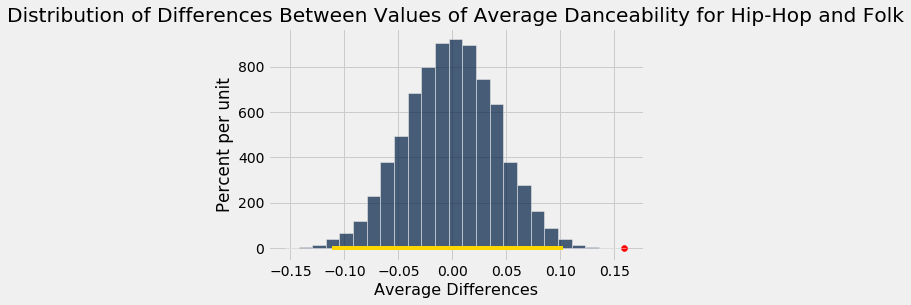

In [242]:
random.seed(1231)
# display results visually: histogram, observed value of test statistic, and 99% confidence interval

Table().with_columns("Average Differences", average_differences).hist(bins=25)

left_bound = percentile(0.5, average_differences)
right_bound = percentile(99.5, average_differences)
interval = [left_bound, right_bound]
print([left_bound, right_bound])

plots.plot(interval, [0,0], color = "gold")
plots.scatter(observed_test_statistic, 0, color="red")
plots.title("Distribution of Differences Between Values of Average Danceability for Hip-Hop and Folk")

In [243]:
random.seed(1231)
# calculate p-value

p_value = np.count_nonzero(observed_test_statistic < average_differences)/repititions * 100

print("p-value cutoff is 1%"), 
print("p-value is equal to", p_value, "%"), 
print("99 % confidence interval is", [left_bound, right_bound]), 
print("observed value is", observed_test_statistic) 

p-value cutoff is 1%
p-value is equal to 0.02 %
99 % confidence interval is [-0.11121986756554703, 0.10261980778339908]
observed value is 0.15863852328353106


 *The 99% confidence interval from about -0.11 to about 0.10 does not include the observed value of our test statistic which was about 0.16. Our p-value cutoff was 1% and our p-value was 0.02 %. As a result, our hypothesis test supports the alternative hypothesis. We can conclude that the average danceability of Hip-Hop is greater than that of Folk in the population.*

## Prediction

**Be sure to set a random seed so that your results are reproducible.**

*First we had to decide which prediction method to use. Since our question is about distinguishing categories, we decided to use for this k-nearest neighbors, as it is a better prediction method for categories, while linear regression works better for numerical prediction.* Furthermore, outliers tend to affect k-nearest neighbors less than linear regression, and based upon exploratory analysis, there were a few outliers.

In [218]:
# defining the train and test tables from a shuffeled table
random.seed(1231)
random_table = all_features_table.sample(all_features_table.num_rows)
trainall = random_table.take(np.arange(50))
testall = random_table.take(np.arange(50,79))
train = trainall.select("danceability","speechiness","track_genre")
test = testall.select("danceability","speechiness","track_genre")

# isolating the columns danceability and speechiness for each table, as well as defining the train labels

traind = train.select(0,1)
testd = test.select(0,1)
features1 = make_array("danceability","speechiness")
classifiers = make_array("track_genre","Folk","Hip_Hop")
train_labels = train.column("track_genre")

In [220]:
random.seed(1231)

# defining the distances function to get an array of the distances between a test row and each row in the training table

def fast_distances(test_row, train_table):
    """Return an array of the distances between test_row and each row in train_rows.

    Takes 2 arguments:
      test_row: A row of a table containing features of one
        test movie (e.g., test_my_features.row(0)).
      train_table: A table of features (for example, the whole
        table train_my_features)."""
    assert train_table.num_columns < 50, "Make sure you're not using all the features of the movies table."
    counts_matrix = np.asmatrix(train_table.columns).transpose()
    diff = np.tile(np.array(list(test_row)), [counts_matrix.shape[0], 1]) - counts_matrix
    np.random.seed(0) # For tie breaking purposes
    distances = np.squeeze(np.asarray(np.sqrt(np.square(diff).sum(1))))
    eps = np.random.uniform(size=distances.shape)*1e-10 #Noise for tie break
    distances = distances + eps
    return distances

# defining the most common function to figure out which cateogry is the most common for the nearest neighbors

def most_common(name, table):
    return table.group(name).sort("count",descending=True).column(0).item(0)

In [221]:
random.seed(1231)

# defining the classify function which takes a test row, and a train table, and gets the distances for the nearest k neighbors,
# then figures out the most common genre


def classify(test_row, train_rows, train_labels, k):
    distances = fast_distances(test_row, train_rows)
    track_genre_and_distances = Table().with_columns("Genre",train_labels,"Distance",distances).sort("Distance")
    return most_common("Genre",track_genre_and_distances.take(np.arange(k)))

In [222]:
random.seed(1231)

# defining classify for an entire test table instead of just one row

def classify_all_rows(teste,k):
    common = make_array()
    for i in np.arange(teste.num_rows):
        common = np.append(common,classify(teste.row(i),traind,train_labels,k))
    return common

# defining classify for an entire test table which returns an array of the proportion correct of guesses for each row

def classify_all_rows_proportion_correct(teste,k):
    guesses = classify_all_rows(teste,k)
    correct = make_array()
    for i in np.arange(len(teste.column(0))):
        if guesses.item(i) == test.column("track_genre").item(i):
            correct = np.append(correct,True)
        else:
            correct = np.append(correct,False)
    proportion_correct = np.count_nonzero(correct)/len(correct)
    return proportion_correct

# defining a classify function which allows the features being used to be set in the function, instead of preset in the table

def classify_all_rows_proportion_correct_changing_features(features,k):
    common = make_array()
    for i in np.arange(testall.num_rows):
        common = np.append(common,classify(testall.select(features).row(i),trainall.select(features),train_labels,k))
    correct = make_array()
    for i in np.arange(len(testall.column(0))):
        if common.item(i) == test.column("track_genre").item(i):
            correct = np.append(correct,True)
        else:
            correct = np.append(correct,False)
    proportion_correct = np.count_nonzero(correct)/len(correct)
    return proportion_correct
    

In [223]:
random.seed(1231)

# defining all possible pairs of features in order to create a table of the proportion correct using classi

feature_pairs = make_array(make_array("acousticness","danceability"),make_array("acousticness","energy"),make_array("acousticness","instrumentalness"),make_array("acousticness","liveness"),make_array("acousticness","speechiness"),make_array("acousticness","tempo"),make_array("acousticness","valence"),make_array("acousticness","track_duration"),
                           make_array("danceability","energy"),make_array("danceability","instrumentalness"),make_array("danceability","liveness"),make_array("danceability","speechiness"),make_array("danceability","tempo"),make_array("danceability","valence"),make_array("danceability","track_duration"),
                           make_array("energy","instrumentalness"),make_array("energy","liveness"),make_array("energy","speechiness"),make_array("energy","tempo"),make_array("energy","valence"),make_array("energy","track_duration"),
                           make_array("instrumentalness","liveness"),make_array("instrumentalness","speechiness"),make_array("instrumentalness","tempo"),make_array("instrumentalness","valence"),make_array("instrumentalness",),make_array("instrumentalness","track_duration"),
                           make_array("liveness","speechiness"),make_array("liveness","tempo"),make_array("liveness","valence"),make_array("liveness",),make_array("liveness","track_duration"),
                           make_array("speechiness","tempo"),make_array("speechiness","valence"),make_array("speechiness","track_duration"),
                           make_array("tempo","valence"),make_array("tempo","track_duration"),
                           make_array("valence","track_duration"))

# creating a table of each pair of features and their proportion correct for guesses for an 8-nearest neighbors test

feature_pairs_1_to_34= make_array()
for pair in feature_pairs:
    feature_pairs_1_to_34 = np.append(feature_pairs_1_to_34,classify_all_rows_proportion_correct_changing_features(pair,8))
pairs_and_correct_for_k_8 = Table().with_columns("Pair",feature_pairs,"Prop Correct",feature_pairs_1_to_34).sort("Prop Correct",descending = True)
pairs_and_correct_for_k_8.show(10)

Pair,Prop Correct
['acousticness' 'liveness'],0.931034
['acousticness' 'valence'],0.896552
['acousticness' 'energy'],0.896552
['acousticness' 'danceability'],0.896552
['liveness' 'valence'],0.862069
['energy' 'speechiness'],0.862069
['danceability' 'speechiness'],0.862069
['danceability' 'liveness'],0.862069
['acousticness' 'speechiness'],0.862069
['speechiness' 'valence'],0.827586


*Looking at the table above we can see which pair of variables generates the most accurate guesses using a randomly chosen k of 8. However, this trend should hold for any given k in general, allowing us to take a look at which features most decide how Folk and Hip-Hop are distinguishable.* 

Text(0.5, 1.0, 'Proportion Correct for Each k Using Acousticness and Liveness as Features to Guess')

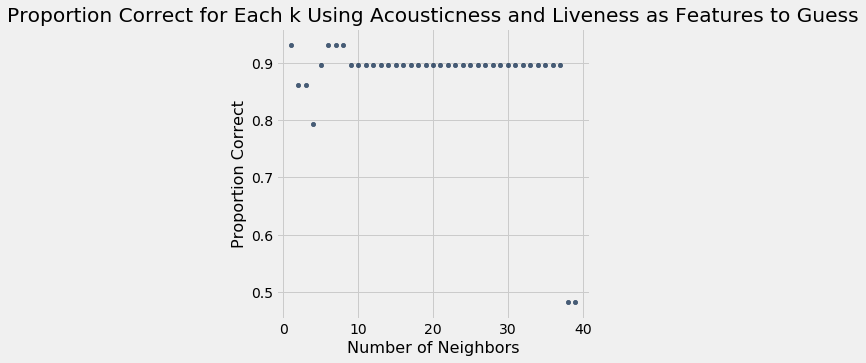

In [232]:
random.seed(1231)

#defining a function which takes in features and returns a scatter plot of proportion correct guesses for each k from 1 to 20

def features_to_scatter(features):
    k_1_to_40s = make_array()
    for i in np.arange(1,40):
        k_1_to_40s = np.append(k_1_to_40s,classify_all_rows_proportion_correct_changing_features(features,i))
    k_correct = Table().with_columns("Number of Neighbors",np.arange(1,40),"Proportion Correct",k_1_to_40s)
    graph = k_correct.scatter("Number of Neighbors")
    plots.title(str(features))
    return graph

features_to_scatter(make_array("acousticness","liveness"))
plots.title("Proportion Correct for Each k Using Acousticness and Liveness as Features to Guess")




*Having seen that the pair of features acousticness and liveness gives the most accurate guesses for k = 8, we can see from the graph above how the proportion correct changes for differing k's. The reason we did not show k above 40 because from 38 onward the prediction accuracy decreases drastically as Hip-Hop starts to overcrowd Folk, as there are more Hip-Hop songs in the sample. Having seen the pairs of features and their success rates, this made us curious about which individual feature would be best at distinguishing between Folk and Hip-Hop.* 

In [225]:
random.seed(1231)

#using ipywidgets to create a dropdown menu where you can choose the variable to create a scatter plot of the proportion correct guesses for k 1 to 20


import ipywidgets as widgets

_ = widgets.interact(features_to_scatter, features=widgets.Dropdown(options=all_features_table.drop("track_genre").labels,description='Feature:',disabled=False,))
                    

interactive(children=(Dropdown(description='Feature:', options=('acousticness', 'danceability', 'energy', 'ins…

*The graph above allows us to see the proportion correct vs number of neighbors for each individual feature. Using this we could determine the feature which has the single highest success rate in prediction.*

Overall, it appears that genre can be predicted, or more specifically Folk can be distinguished from Hip-Hop using the features given in the dataset. More features give more accurate predictions, which is to be expected. However, it is not always true that having more neighbors gives a more accurate prediction, as data starts to get crowded and messy.

## Conclusion

*In conclusion, in this research report we attempted to clarify whether genre is an easily distinguishable human construct, and explored the possible ways genre can be classified and therefore predicted. We used an A/B testing procedure to reveal that there is a level of correlation between a song's danceability, and whether it is classified as Folk or Hip-Hop. We came to the conclusion that on average, since Hip-Hop songs tend to have higher dancibility, there was a definite difference between the two genres, as displayed by our p-value of 0.02 % which justified that there was a difference that was not due to chance. Furthermore, we were pleased with the success rate of our prediction algorithm, as no matter the random sample, our success rate was always greater than 60%.* 

*Although the dataset we were given was clean, we realised during our exploratory data analysis that the number of songs from each genre was not even near to equal. This could create problems if we wanted to compare genres such as Pop and Rock, as Pop only has 13 songs while Rock has 215, which would be very biased if we tried to use k-nearest neighbors for any prediction, as Rock would crowd out Pop completely. To counter this in sampling, it would be better to take a larger random sample to get a wider distribution.*



## Presentation

*In this section, you'll need to provide a link to your video presentation. If you've uploaded your presentation to YouTube,
you can include the URL in the code below. We've provided an example to show you how to do this. Otherwise, provide the link
in a markdown cell.*

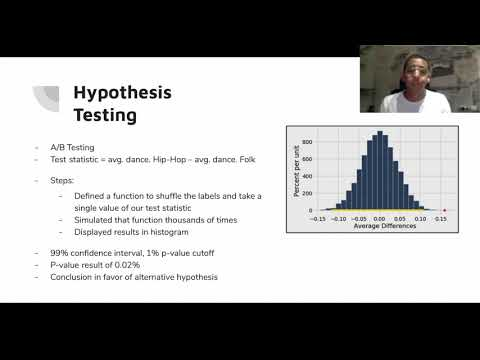

In [4]:
# Full Link: https://www.youtube.com/watch?v=BKgdDLrSC5s&feature=emb_logo
# Plug in string between "v=" and ""&feature":
YouTubeVideo('5R1GZAorr3E')